In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [3]:
X = X/np.amax(X, axis=0)
y = y/100

In [32]:
class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        self.W1 = np.random.randn(self.inputLayerSize, \
                                 self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                 self.outputLayerSize)
    
    def forward(self, X):
        
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        # Derivative of Simoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # Compute cost for given X,y
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
        

In [16]:
nn = Neural_Network()

In [12]:
testValues = np.arange(-5,5,0.01)

In [20]:
%matplotlib inline

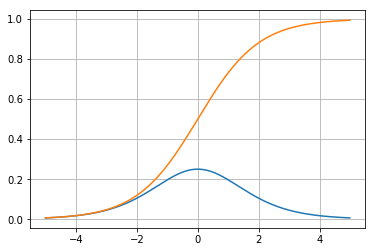

In [22]:
plt.plot(testValues, nn.sigmoidPrime(testValues))
plt.plot(testValues, nn.sigmoid(testValues))
plt.grid(1)

In [33]:
NN = Neural_Network()

In [34]:
cost1 = NN.costFunction(X,y)

In [35]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [36]:
dJdW1

array([[-0.01809619,  0.03454734,  0.00122414],
       [-0.01208995,  0.02498025,  0.00108112]])

In [37]:
dJdW2

array([[-0.15720684],
       [-0.18979179],
       [-0.08584849]])

In [38]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [39]:
print(cost1, cost2)

(array([ 0.25677182]), array([ 0.49200958]))


In [42]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
scalar = -3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost3 = NN.costFunction(X,y)

In [43]:
print(cost2, cost3)

(array([ 0.49200958]), array([ 0.09422488]))
